In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os
import pandas as pd
from pathlib import Path
import georasters as gr
import datetime
from pathlib import Path
import re

In [2]:
X_dir_SN = "/opt/datos/dataset/sin_normalizar/X_test.npy"
X_SN = np.load(X_dir_SN)

print("X: %s" %str(X_SN.shape))

X: (1789, 3, 176, 176)


In [3]:
z_500_SN = X_SN[:,2,:,:]
z_700_SN = X_SN[:,1,:,:]
z_1000_SN = X_SN[:,0,:,:]
print(z_500_SN.shape)
print(z_700_SN.shape)
print(z_1000_SN.shape)

(1789, 176, 176)
(1789, 176, 176)
(1789, 176, 176)


#### Muestras en el tiempo de un pixel en X (gpm)

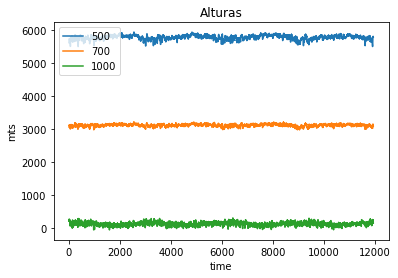

In [4]:
#print(history)
plt.plot(z_500_SN[:,100,100])
plt.plot(z_700_SN[:,100,100])
plt.plot(z_1000_SN[:,100,100])
#plt.plot(y[:,100,100])
plt.title('Alturas')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['500', '700', '1000'], loc='upper left')
#plt.legend(['500'], loc='upper right')
plt.show()

In [4]:
Y_dir = "/opt/datos/dataset/milimetros/Y_test.npy"
Y = np.load(Y_dir)

print("Y: %s" %str(Y.shape))

Y: (1789, 176, 176)


In [5]:
#Y_flip = np.flipud(Y)

Y_flip = np.empty((1789,176,176))

for i in range(0,1789):
    Y_flip[i,:,:] = np.flipud(Y[i,:,:])    

In [6]:
print("Y: %s" %str(Y.shape))
print("Y_flip: %s" %str(Y_flip.shape))

Y: (1789, 176, 176)
Y_flip: (1789, 176, 176)


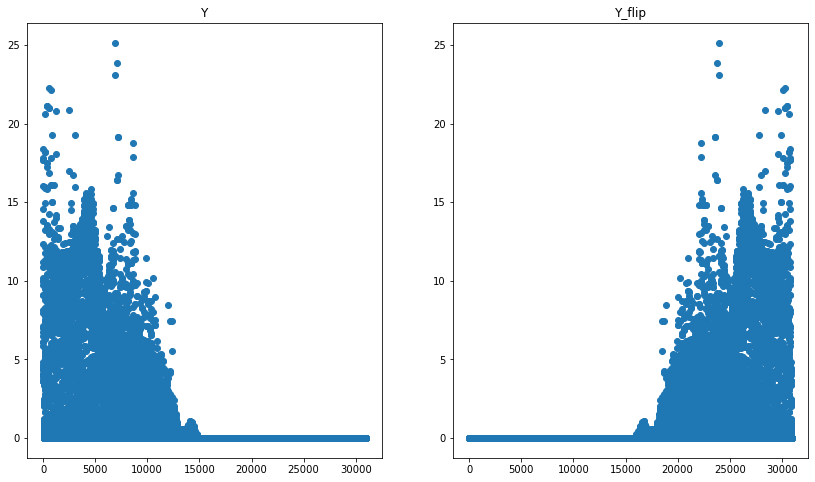

In [10]:
muestra = 100
#img = [z_500_SN[muestra,:,:].flatten()[27000:30000], Y[muestra,:,:].flatten()[27000:30000]]
img = [Y[muestra,:,:].flatten(), Y_flip[muestra,:,:].flatten()]
rows=1
columns=2
titulos = ['Y','Y_flip']
fig=plt.figure(figsize=(14,8))
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.plot(img[i-1], 'o')
    plt.title(titulos[i-1])
#print(f"Maximo en WRF: {y_test[muestra,:,:].max()} - Maximo en VGG16: {y_pred3[muestra,:,:,0].max()}")
plt.show()

#### Muestras en el tiempo de un pixel en Y (mm)

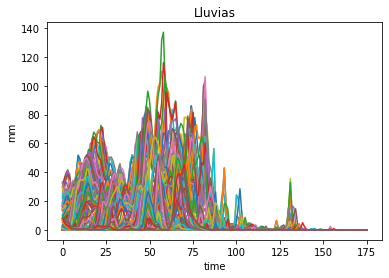

max mm:  137.0980224609375
(array([84]), array([58]), array([132]))


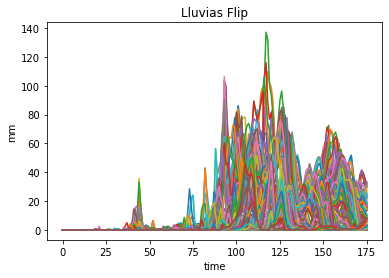

max mm:  137.0980224609375
(array([84]), array([58]), array([132]))


In [11]:
################################################################
plt.plot(Y[84,:,:])
plt.title('Lluvias')
plt.ylabel('mm')
plt.xlabel('time')
plt.show()

print("max mm: ", Y.max())
print(np.where(Y == Y.max()))

################################################################
plt.plot(Y_flip[84,:,:])
plt.title('Lluvias Flip')
plt.ylabel('mm')
plt.xlabel('time')
plt.show()

print("max mm: ", Y.max())
print(np.where(Y == Y.max()))

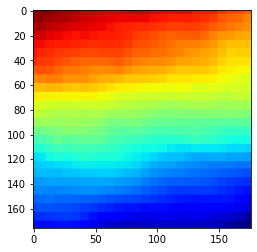

In [47]:
plt.imshow(z_500_SN[84],cmap = 'jet')

137.0980224609375


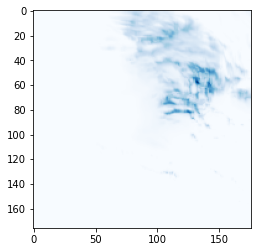

In [24]:
plt.imshow(Y[84],cmap = 'Blues')
print(Y[84].max())

137.0980224609375


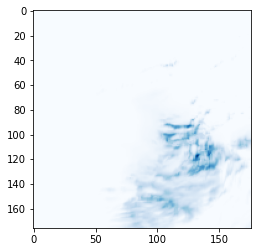

In [23]:
plt.imshow(Y_flip[84],cmap = 'Blues')
print(Y_flip[84].max())

cantidad de mm:  0.0
altura: 5758.51123046875


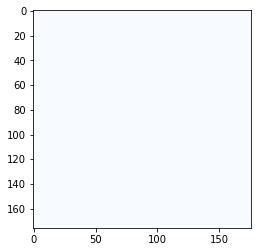

In [50]:
## sin lluvia
plt.imshow(Y[84],cmap = 'Blues')
#print(Y[1500].max())
#print(np.where(Y[1500] == Y[1500].max()))
print("cantidad de mm: ",Y[100,130,2])
#print(Y.shape)

print("altura:",z_500_SN[100,130,2])

### Validacion alturas vs mm

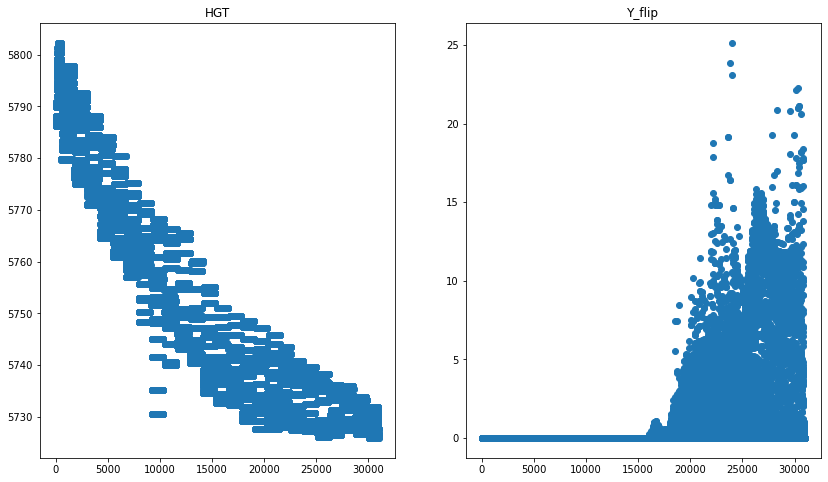

In [15]:
####### Compruebo con Y_flip
muestra = 100
#img = [z_500_SN[muestra,:,:].flatten()[27000:30000], Y[muestra,:,:].flatten()[27000:30000]]
img = [z_500_SN[muestra,:,:].flatten(), Y_flip[muestra,:,:].flatten()]
rows=1
columns=2
titulos = ['HGT','Y_flip']
fig=plt.figure(figsize=(14,8))
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.plot(img[i-1], 'o')
    plt.title(titulos[i-1])
#print(f"Maximo en WRF: {y_test[muestra,:,:].max()} - Maximo en VGG16: {y_pred3[muestra,:,:,0].max()}")
plt.show()

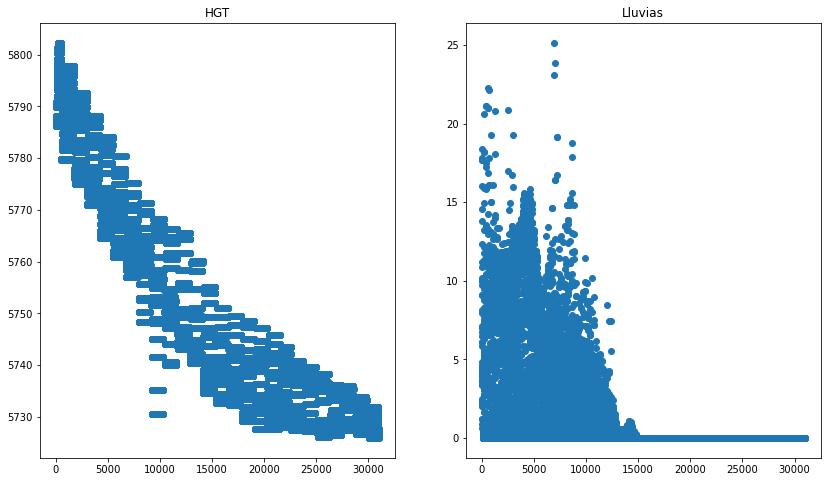

In [58]:
muestra = 100
#img = [z_500_SN[muestra,:,:].flatten()[27000:30000], Y[muestra,:,:].flatten()[27000:30000]]
img = [z_500_SN[muestra,:,:].flatten(), Y[muestra,:,:].flatten()]
rows=1
columns=2
titulos = ['HGT','Lluvias']
fig=plt.figure(figsize=(14,8))
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.plot(img[i-1], 'o')
    plt.title(titulos[i-1])
#print(f"Maximo en WRF: {y_test[muestra,:,:].max()} - Maximo en VGG16: {y_pred3[muestra,:,:,0].max()}")
plt.show()


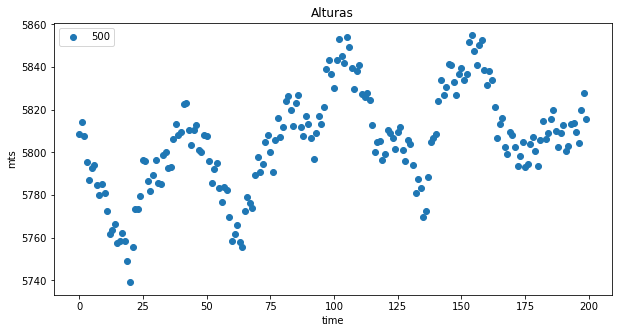

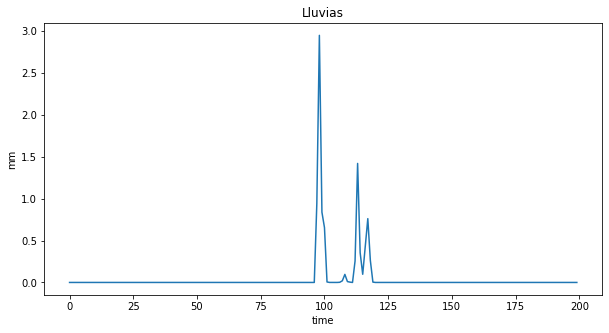

In [16]:
m_in = 1000 
m_fin = 1200

pixel_x = 60
pixel_y = 10

plt.figure(figsize=(10,5))
plt.plot(z_500_SN[m_in:m_fin,pixel_x,pixel_y], 'o')
plt.title('Alturas')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['500'], loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(Y_flip[m_in:m_fin,pixel_x,pixel_y])
plt.title('Lluvias')
plt.ylabel('mm')
plt.xlabel('time')
plt.show()



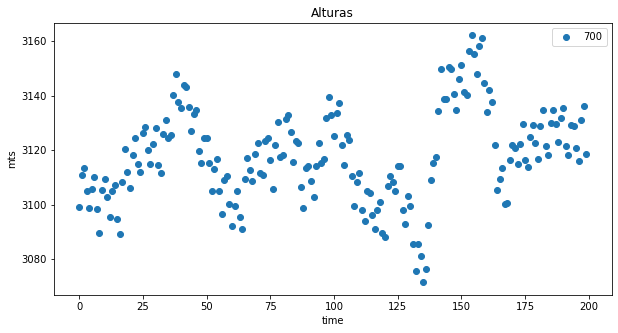

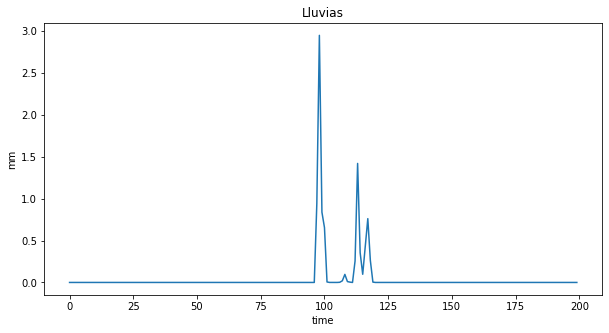

In [17]:
#################################################################################################
plt.figure(figsize=(10,5))
plt.plot(z_700_SN[m_in:m_fin,pixel_x,pixel_y], 'o')
plt.title('Alturas')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['700'], loc='upper right')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(Y_flip[m_in:m_fin,pixel_x,pixel_y])
plt.title('Lluvias')
plt.ylabel('mm')
plt.xlabel('time')
plt.show()

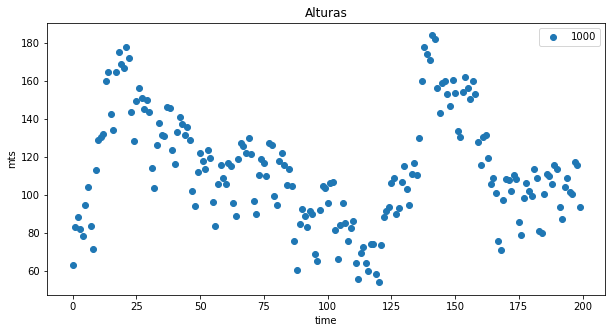

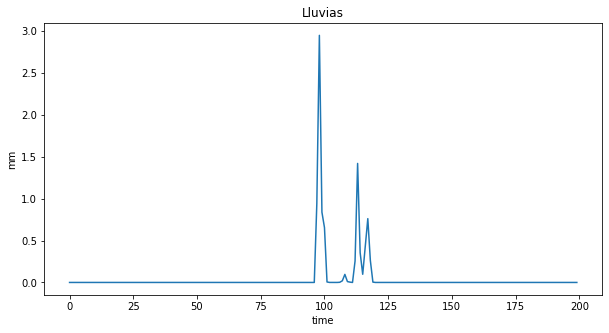

In [18]:
#################################################################################################3
plt.figure(figsize=(10,5))
plt.plot(z_1000_SN[m_in:m_fin,pixel_x,pixel_y], 'o')
plt.title('Alturas')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['1000'], loc='upper right')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(Y_flip[m_in:m_fin,pixel_x,pixel_y])
plt.title('Lluvias')
plt.ylabel('mm')
plt.xlabel('time')
plt.show()

### Dataset Larraondo, chequeo correlación:

In [63]:
X_dir = "/opt/datos/dataset/larraondo/x_test-0_3_5_validation.npy"
X_l = np.load(X_dir)

print("X: %s" %str(X_l.shape))

Y_dir = "/opt/datos/dataset/larraondo/y_test-0_3_5_validation.npy"
Y_l = np.load(Y_dir)

print("Y: %s" %str(Y_l.shape))

X: (10805, 80, 120, 3)
Y: (10805, 80, 120)


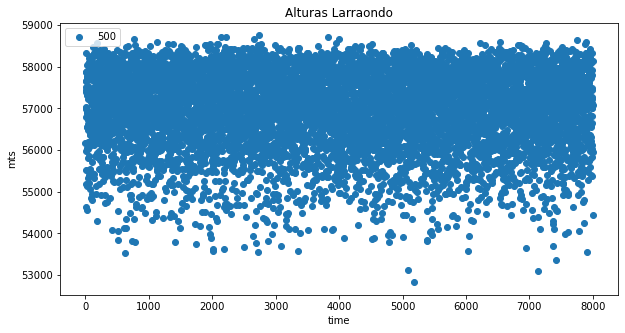

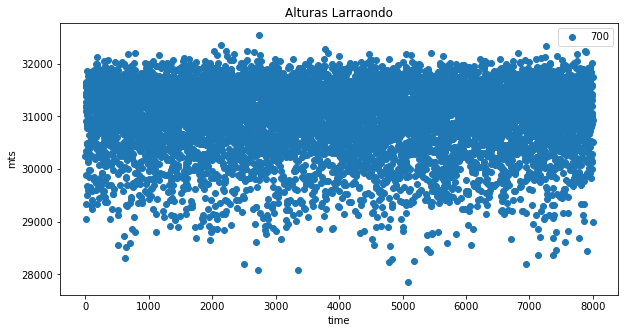

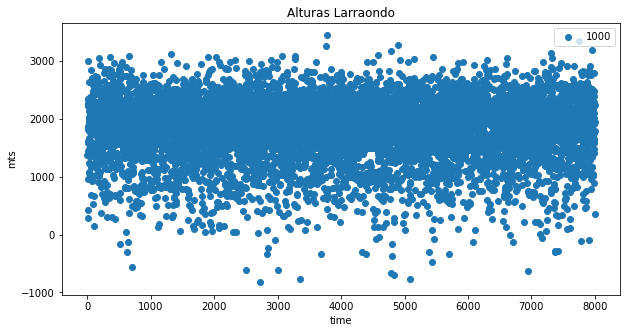

In [8]:
plt.figure(figsize=(10,5))
plt.plot(X_l[1500:9500,55,20, 2], 'o')
plt.title('Alturas Larraondo')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['500'], loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(X_l[1500:9500,55,20, 1], 'o')
plt.title('Alturas Larraondo')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['700'], loc='upper right')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(X_l[1500:9500,55,20, 0], 'o')
plt.title('Alturas Larraondo')
plt.ylabel('mts')
plt.xlabel('time')
plt.legend(['1000'], loc='upper right')
plt.show()

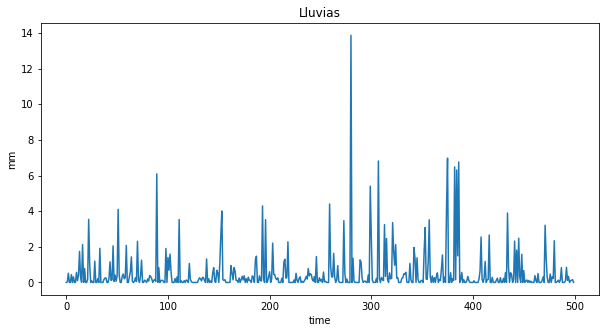

In [7]:
plt.figure(figsize=(10,5))
plt.plot(Y_l[1500:2000,55,20]*1000)
plt.title('Lluvias')
plt.ylabel('mm')
plt.xlabel('time')
plt.show()

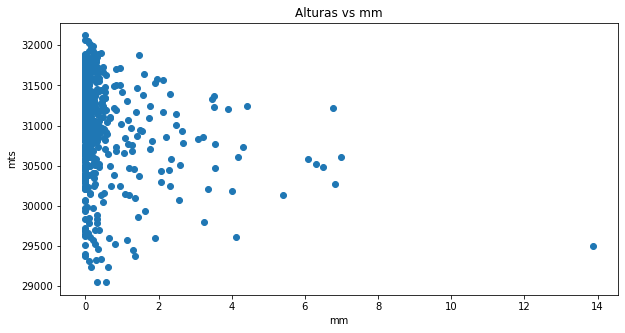

In [8]:
plt.figure(figsize=(10,5))
plt.plot(Y_l[1500:2000,55,20]*1000, X_l[1500:2000,55,20, 1],'o')
plt.title('Alturas vs mm')
plt.ylabel('mts')
plt.xlabel('mm')
plt.show()

In [64]:
Y_l.max()

0.1147995

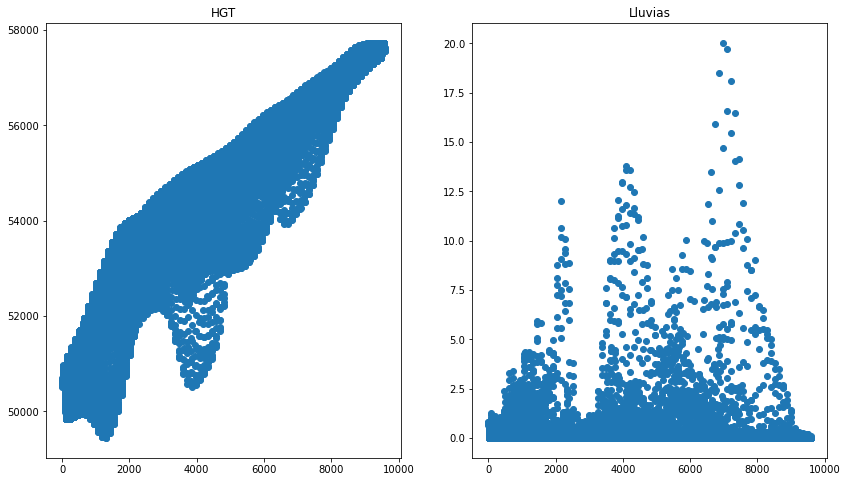

In [66]:
muestra = 100
#img = [z_500_SN[muestra,:,:].flatten()[27000:30000], Y[muestra,:,:].flatten()[27000:30000]]
img = [X_l[1500,:,:, 2].flatten(), Y_l[1500,:,:].flatten()*1000]
rows=1
columns=2
titulos = ['HGT','Lluvias']
fig=plt.figure(figsize=(14,8))
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.plot(img[i-1], 'o')
    plt.title(titulos[i-1])
#print(f"Maximo en WRF: {y_test[muestra,:,:].max()} - Maximo en VGG16: {y_pred3[muestra,:,:,0].max()}")
plt.show()